# Linear Regression

-*- encoding: utf-8 -*-
  Assume the data-set to have data for the fields --> Study-time and Marks obtained


  Students: 1-n
  Study-time: 0h to 10h
  Marks-Obtained: 0-100



  Basic Equation: y=mx+b
  Derivation given separately


In [2]:
import pandas as pd
import matplotlib.pyplot as mplt

Now we read the data from a CSV File

In [5]:
csvData = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

# Method-1
'''
  Here the independent axis (X-axis) will have the hours studies.
  Dependent axis (Y-axis) will have marks obtained.

  Here we define a loss function --> we check the error function 
'''

We Create a Loss function based on the line equation y = mx+b

In [6]:
def lossFunction(m, b, points):
  totalError = 0

  for i in range(len(points)):
    x = points.iloc[i].Hours
    y = points.iloc[i].Scores

    totalError += (y-(m*x+b))**2

  totalError / float(len(points))

We then perform gradient descent on the given loss function which is nothing but the mean square error between the line and the points scattered on the graph.

In [7]:
def gradientDescent(currentM, currentB, points, L):
  mGradient = 0
  bGradient = 0

  n = len(points)

  for i in range(n):
    x = points.iloc[i].Hours
    y = points.iloc[i].Scores

    mGradient += -(2/n)*x*(y-(currentM*x+currentB))
    bGradient += -(2/n)*(y-(currentM*x+currentB))

  m = currentM - mGradient*L
  b = currentB - bGradient*L
  return m,b

9.899781960077645 1.6319314519606556


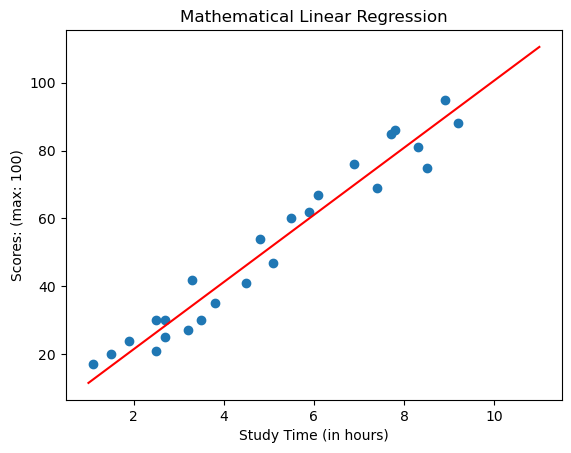

In [8]:
m = 0
b = 0
L = 0.001
epochs = 100

for _ in range(epochs):
  m, b = gradientDescent(m, b, csvData, L)

print(m, b)

mplt.scatter(csvData.Hours, csvData.Scores)
mplt.title("Mathematical Linear Regression")
mplt.xlabel('Study Time (in hours)')
mplt.ylabel('Scores: (max: 100)')
mplt.plot(list(range(1, 12)), [m*x+b for x in range(1, 12)], color="red")
mplt.show()

# Method-2

Now using scikit-learn python library

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

We then load data set into target and independent variables

In [10]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

We then initialise and fit the model with the imported dataset.

Using the prediction function we try fitting a line for all points.

Ensure the graph is neither under-fitted nor over-fitted.

In [11]:
lrModel = LinearRegression()
lrModel.fit(X, y)

yPred = lrModel.predict(X)

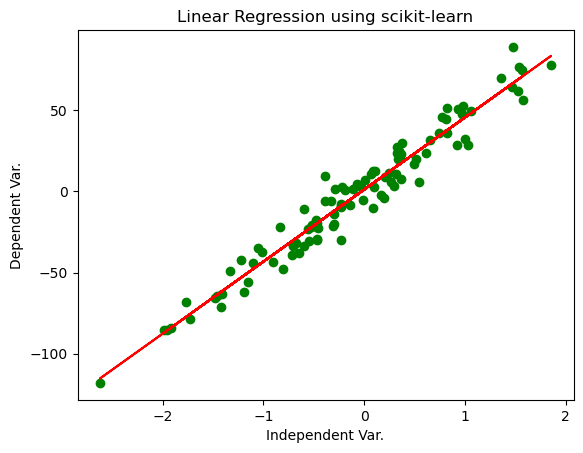

In [12]:
mplt.scatter(X, y, color="green", label="Data Points")
mplt.plot(X, yPred, color="red", label="Regression Line")
mplt.title('Linear Regression using scikit-learn')
mplt.xlabel('Independent Var.')
mplt.ylabel('Dependent Var.')
mplt.show()